In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn.decomposition import PCA

In [67]:
from yellowbrick.datasets import load_credit
from yellowbrick.features.pca import PCADecomposition

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage,ward,cut_tree

In [91]:
from scipy.spatial.distance import cityblock

In [104]:
from sklearn.cluster import AgglomerativeClustering

In [77]:
import seaborn as sns

In [112]:
from scipy.spatial.distance import pdist, squareform

In [20]:
data=pd.read_excel('C:\\Users\\LENOVO\\mcdonalds.xlsx')

In [21]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [23]:
data['Like'].unique()

array([-3, 2, 1, 4, 'I love it!+5', 'I hate it!-5', -2, 3, 0, -4, -1],
      dtype=object)

In [24]:
def test(a):
    if type(a)==str:
        return int(a.split('!')[1])
    else:
        return a

In [25]:
a='I hate it!-5'
test(a)

-5

In [26]:
data['Like']=data['Like'].apply(test)

In [27]:
data1=pd.get_dummies(data=data,columns=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','VisitFrequency','Gender'],drop_first=True)

In [28]:
data1

,Like,Age,yummy_Yes,convenient_Yes,spicy_Yes,fattening_Yes,greasy_Yes,fast_Yes,cheap_Yes,tasty_Yes,expensive_Yes,healthy_Yes,disgusting_Yes,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Male
0,-3,61,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0
1,2,51,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
2,1,62,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0
3,4,69,1,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0
4,2,49,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-5,47,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1
1449,2,36,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0
1450,3,52,1,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0
1451,4,41,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1


In [31]:
data.describe()

,Like,Age
count,1453.000000,1453.000000
mean,0.777013,44.604955
std,3.116842,14.221178
min,-5.000000,18.000000
25%,-1.000000,33.000000
50%,1.000000,45.000000
75%,3.000000,57.000000
max,5.000000,71.000000


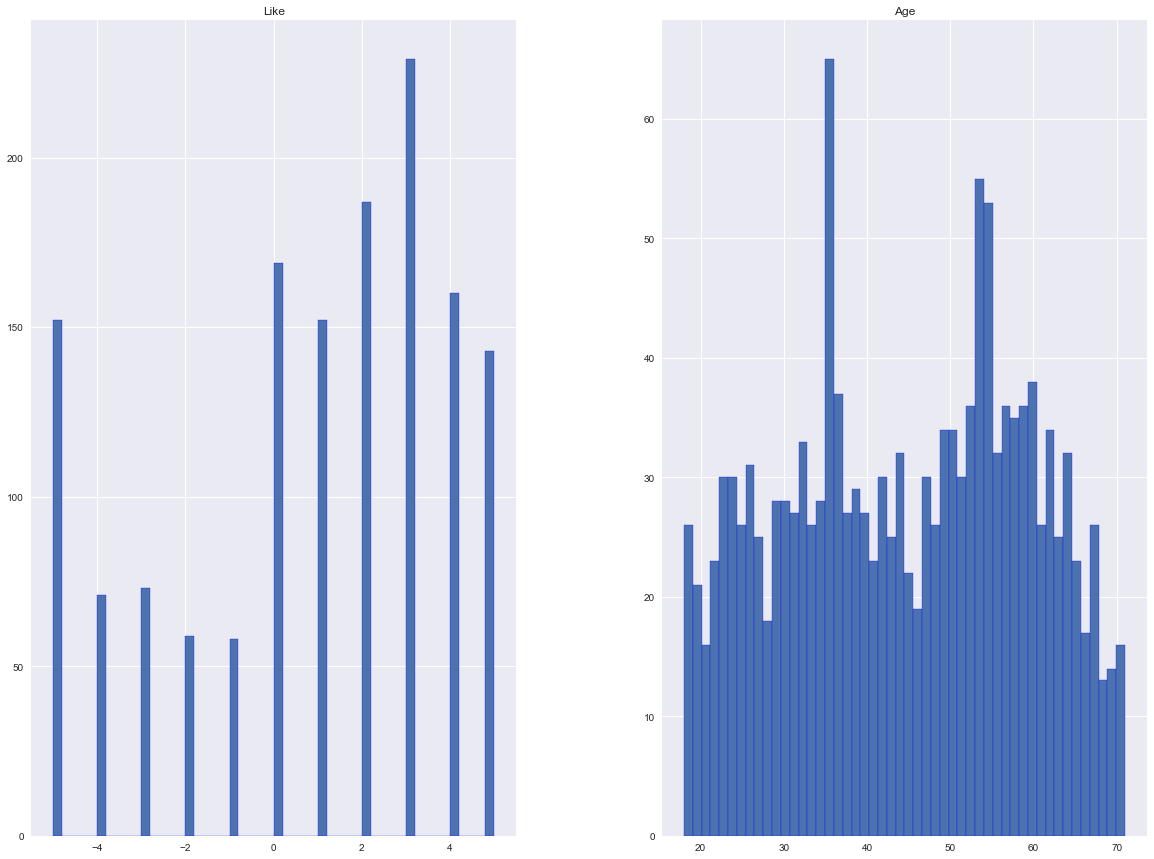

In [34]:
plt.style.use('seaborn')
data.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

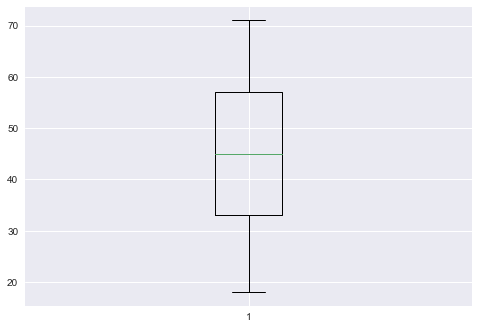

In [38]:
plt.boxplot(data['Age'])
plt.show()

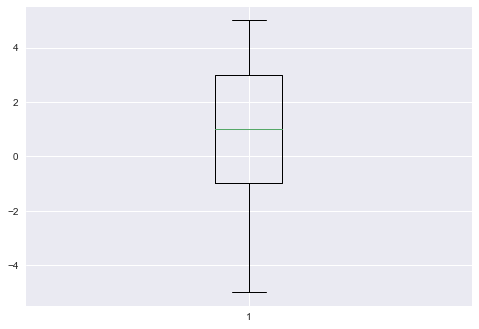

In [39]:
plt.boxplot(data['Like'])
plt.show()

In [54]:
object = StandardScaler()
data1['Age']=object.fit_transform(np.array(data1['Age']).reshape(1453,1))

In [55]:
data1['Like']=object.fit_transform(np.array(data1['Like']).reshape(1453,1))

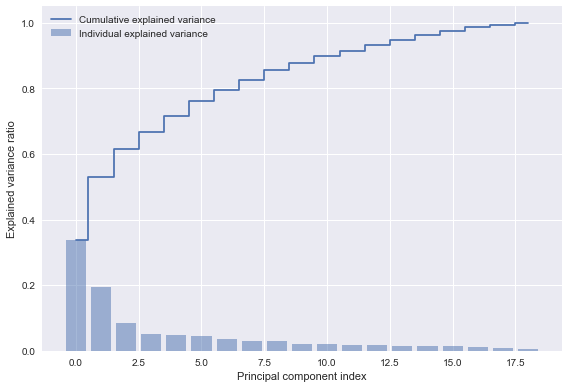

In [65]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca =pca.fit_transform(data1)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

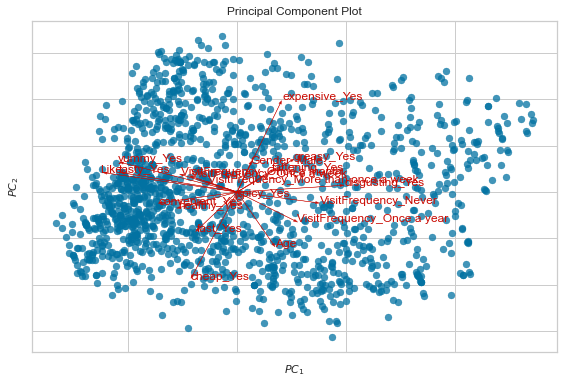

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [76]:
visualizer = PCADecomposition(scale=True, proj_features = True, color = None)
visualizer.fit_transform(data1)
visualizer.show()

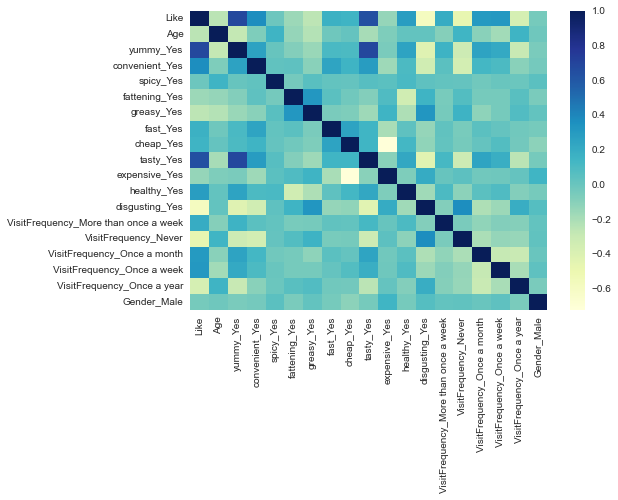

In [83]:
ax = sns.heatmap(data1.corr(), cmap="YlGnBu", annot=False)


In [89]:
data1[data1.columns].mean()

Like                                   -1.768105e-16
Age                                     9.046828e-17
yummy_Yes                               5.526497e-01
convenient_Yes                          9.077770e-01
spicy_Yes                               9.359945e-02
fattening_Yes                           8.671714e-01
greasy_Yes                              5.264969e-01
fast_Yes                                9.002065e-01
cheap_Yes                               5.987612e-01
tasty_Yes                               6.441844e-01
expensive_Yes                           3.578802e-01
healthy_Yes                             1.988988e-01
disgusting_Yes                          2.429456e-01
VisitFrequency_More than once a week    3.716449e-02
VisitFrequency_Never                    9.015829e-02
VisitFrequency_Once a month             3.021335e-01
VisitFrequency_Once a week              1.617343e-01
VisitFrequency_Once a year              1.734343e-01
Gender_Male                             4.5767

In [92]:
linkage_data = linkage(data1, method='ward', metric='euclidean')

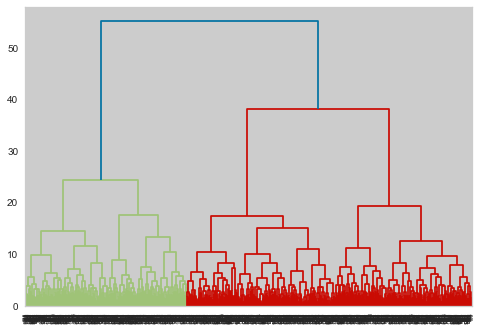

In [93]:
dendrogram(linkage_data)
plt.show()

In [113]:
hclust = linkage(data1, method='average', metric='euclidean')
print(hclust)

[[8.80000000e+01 4.53000000e+02 0.00000000e+00 2.00000000e+00]
 [6.49000000e+02 9.71000000e+02 0.00000000e+00 2.00000000e+00]
 [1.13000000e+02 7.99000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [2.45600000e+03 2.90100000e+03 3.15734664e+00 1.12700000e+03]
 [2.89700000e+03 2.90000000e+03 3.27307041e+00 3.26000000e+02]
 [2.90200000e+03 2.90300000e+03 3.53318137e+00 1.45300000e+03]]


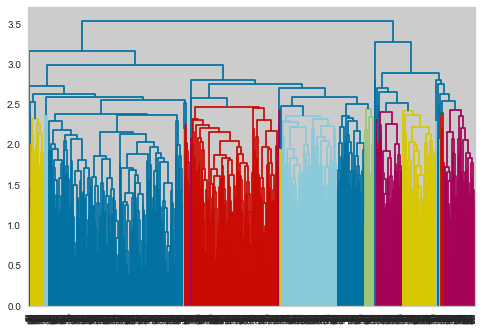

In [117]:
labels, indices = np.unique(data1.index, return_inverse=True)
country_labels = labels[indices] 

d = dendrogram(hclust, labels=country_labels, leaf_rotation=90)
plt.show()

In [132]:
cluster3 = pd.DataFrame({'index': country_labels, 'Level': cut_tree(hclust, height=3)[:,0]})

print(cluster3)

      index  Level
0         0      0
1         1      1
2         2      1
3         3      1
4         4      1
...     ...    ...
1448   1448      0
1449   1449      1
1450   1450      1
1451   1451      1
1452   1452      0

[1453 rows x 2 columns]


In [133]:
data1.reset_index(inplace=True)


ValueError: cannot insert level_0, already exists

In [134]:
data1["Level"] = cluster3["Level"]
data1.groupby(["Level"]).mean()

,level_0,index,Like,Age,yummy_Yes,convenient_Yes,spicy_Yes,fattening_Yes,greasy_Yes,fast_Yes,...,tasty_Yes,expensive_Yes,healthy_Yes,disgusting_Yes,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Male
Level,,,,,,,,,,,,,,,,,,,,,
0,742.804348,742.804348,-1.473369,0.286437,0.065217,0.677019,0.108696,0.922360,0.745342,0.801242,...,0.164596,0.496894,0.049689,0.739130,0.000,0.341615,0.034161,0.02795,0.409938,0.468944
1,720.987556,720.987556,0.419903,-0.085322,0.691556,0.976000,0.084444,0.852444,0.463111,0.931556,...,0.782222,0.318222,0.239111,0.098667,0.048,0.016889,0.377778,0.20000,0.106667,0.456000
2,820.750000,820.750000,-0.088907,1.082916,0.500000,0.500000,1.000000,1.000000,1.000000,0.500000,...,0.500000,0.000000,0.500000,1.000000,0.000,0.500000,0.250000,0.25000,0.000000,0.250000
3,650.500000,650.500000,1.194885,-0.288750,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,...,0.500000,1.000000,1.000000,0.000000,0.000,0.000000,1.000000,0.00000,0.000000,0.000000


In [1]:
!pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install mclust

ERROR: Could not find a version that satisfies the requirement mclust (from versions: none)
ERROR: No matching distribution found for mclust

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pyreadr


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for pyreadr from https://files.pythonhosted.org/packages/54/e9/e2dad2494987a9e33cfe5e05aa76a7522b1cdc493e888394afff622cd1e1/pyreadr-0.4.9-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 1.3/1.3 MB 635.9 kB/s eta 0:00:00


In [4]:
!pip install mssa

ERROR: Could not find a version that satisfies the requirement mssa (from versions: none)
ERROR: No matching distribution found for mssa

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip
